In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
import torch
import torch.nn as nn
import torch.utils.data as data_utils
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score, 
    roc_curve
)



from sklearn.metrics import classification_report
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm



import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)


In [2]:
df1 = pd.read_csv(r"D:\T24\Yeasin's Model\Dataset\ANDA-UNSWNB15-PROTO_NOT_SCALED.csv")
print(f"Dataset Shape: {df1.shape}")
display(df1.head(10))

Dataset Shape: (257673, 44)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,-0.006232,119,0,5,-0.2,-0.2,-0.025641,-0.167293,0.703801,0.000000,-0.115079,2.245592,-0.07905,0.0,0.0,-0.006382,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.069767,-0.494382,0.0,0.0,-0.3,1.0,-0.2,0.000000,0.0,-0.142857,0.0,0.0,0.0,-0.333333,-0.222222,False,6,False
1,-0.006237,119,0,5,-0.2,-0.2,0.988782,-0.167293,0.976595,0.000000,-0.115079,11.004895,-0.07905,0.0,0.0,-0.006433,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.790698,-0.494382,0.0,0.0,-0.3,1.0,-0.2,0.000000,0.0,-0.142857,0.0,0.0,0.0,-0.333333,-0.222222,False,6,False
2,-0.006241,119,0,5,-0.2,-0.2,0.432692,-0.167293,1.576743,0.000000,-0.115079,10.672344,-0.07905,0.0,0.0,-0.006485,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.720930,-0.494382,0.0,0.0,-0.2,1.0,-0.2,0.000000,0.0,0.000000,0.0,0.0,0.0,-0.333333,-0.111111,False,6,False
3,-0.006240,119,0,5,-0.2,-0.2,0.298077,-0.167293,1.310011,0.000000,-0.115079,7.491854,-0.07905,0.0,0.0,-0.006468,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.767442,-0.494382,0.0,0.0,-0.2,1.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,-0.166667,-0.111111,False,6,False
4,-0.006234,119,0,5,-0.2,-0.2,1.280449,-0.167293,0.776546,0.000000,-0.115079,10.622336,-0.07905,0.0,0.0,-0.006399,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.023256,-0.494382,0.0,0.0,-0.2,1.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,-0.166667,-0.111111,False,6,False
5,-0.006244,119,0,5,-0.2,-0.2,0.205128,-0.167293,2.643673,0.000000,-0.115079,13.059378,-0.07905,0.0,0.0,-0.006519,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.418605,-0.494382,0.0,0.0,-0.3,1.0,0.0,0.333333,0.0,-0.142857,0.0,0.0,0.0,-0.166667,-0.222222,False,6,False
6,-0.006240,119,0,5,-0.2,-0.2,1.147436,-0.167293,1.310011,0.000000,-0.115079,16.326547,-0.07905,0.0,0.0,-0.006468,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.093023,-0.494382,0.0,0.0,-0.3,1.0,0.0,0.333333,0.0,-0.142857,0.0,0.0,0.0,-0.166667,-0.222222,False,6,False
7,-0.006208,119,0,5,-0.2,-0.2,0.685897,-0.167293,0.262134,0.000000,-0.115079,2.462508,-0.07905,0.0,0.0,-0.006089,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.395349,-0.494382,0.0,0.0,-0.2,1.0,-0.2,0.000000,0.0,0.000000,0.0,0.0,0.0,-0.333333,-0.111111,False,6,False
8,-0.006248,6,0,5,-0.3,-0.2,-0.386218,-0.167293,-0.023651,-1.322917,-0.115079,-0.009301,-0.07905,0.0,0.0,1032.943500,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.627907,-0.494382,0.0,0.0,-0.3,1.0,0.0,0.333333,0.5,-0.142857,0.0,0.0,0.0,-0.166667,-0.222222,True,6,False
9,-0.006248,6,0,5,-0.3,-0.2,-0.386218,-0.167293,-0.023651,-1.322917,-0.115079,-0.009301,-0.07905,0.0,0.0,1032.943800,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.627907,-0.494382,0.0,0.0,-0.3,1.0,0.0,0.333333,0.5,-0.142857,0.0,0.0,0.0,-0.166667,-0.222222,True,6,False


In [3]:
le_city = LabelEncoder()
df1['is_sm_ips_ports'] = le_city.fit_transform(df1['is_sm_ips_ports'])
df1['label'] = le_city.fit_transform(df1['label'])

In [4]:
display(df1.head(10))

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,-0.006232,119,0,5,-0.2,-0.2,-0.025641,-0.167293,0.703801,0.000000,-0.115079,2.245592,-0.07905,0.0,0.0,-0.006382,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.069767,-0.494382,0.0,0.0,-0.3,1.0,-0.2,0.000000,0.0,-0.142857,0.0,0.0,0.0,-0.333333,-0.222222,0,6,0
1,-0.006237,119,0,5,-0.2,-0.2,0.988782,-0.167293,0.976595,0.000000,-0.115079,11.004895,-0.07905,0.0,0.0,-0.006433,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.790698,-0.494382,0.0,0.0,-0.3,1.0,-0.2,0.000000,0.0,-0.142857,0.0,0.0,0.0,-0.333333,-0.222222,0,6,0
2,-0.006241,119,0,5,-0.2,-0.2,0.432692,-0.167293,1.576743,0.000000,-0.115079,10.672344,-0.07905,0.0,0.0,-0.006485,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.720930,-0.494382,0.0,0.0,-0.2,1.0,-0.2,0.000000,0.0,0.000000,0.0,0.0,0.0,-0.333333,-0.111111,0,6,0
3,-0.006240,119,0,5,-0.2,-0.2,0.298077,-0.167293,1.310011,0.000000,-0.115079,7.491854,-0.07905,0.0,0.0,-0.006468,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.767442,-0.494382,0.0,0.0,-0.2,1.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,-0.166667,-0.111111,0,6,0
4,-0.006234,119,0,5,-0.2,-0.2,1.280449,-0.167293,0.776546,0.000000,-0.115079,10.622336,-0.07905,0.0,0.0,-0.006399,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.023256,-0.494382,0.0,0.0,-0.2,1.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,-0.166667,-0.111111,0,6,0
5,-0.006244,119,0,5,-0.2,-0.2,0.205128,-0.167293,2.643673,0.000000,-0.115079,13.059378,-0.07905,0.0,0.0,-0.006519,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.418605,-0.494382,0.0,0.0,-0.3,1.0,0.0,0.333333,0.0,-0.142857,0.0,0.0,0.0,-0.166667,-0.222222,0,6,0
6,-0.006240,119,0,5,-0.2,-0.2,1.147436,-0.167293,1.310011,0.000000,-0.115079,16.326547,-0.07905,0.0,0.0,-0.006468,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.093023,-0.494382,0.0,0.0,-0.3,1.0,0.0,0.333333,0.0,-0.142857,0.0,0.0,0.0,-0.166667,-0.222222,0,6,0
7,-0.006208,119,0,5,-0.2,-0.2,0.685897,-0.167293,0.262134,0.000000,-0.115079,2.462508,-0.07905,0.0,0.0,-0.006089,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.395349,-0.494382,0.0,0.0,-0.2,1.0,-0.2,0.000000,0.0,0.000000,0.0,0.0,0.0,-0.333333,-0.111111,0,6,0
8,-0.006248,6,0,5,-0.3,-0.2,-0.386218,-0.167293,-0.023651,-1.322917,-0.115079,-0.009301,-0.07905,0.0,0.0,1032.943500,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.627907,-0.494382,0.0,0.0,-0.3,1.0,0.0,0.333333,0.5,-0.142857,0.0,0.0,0.0,-0.166667,-0.222222,1,6,0
9,-0.006248,6,0,5,-0.3,-0.2,-0.386218,-0.167293,-0.023651,-1.322917,-0.115079,-0.009301,-0.07905,0.0,0.0,1032.943800,-0.000124,-0.000242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.627907,-0.494382,0.0,0.0,-0.3,1.0,0.0,0.333333,0.5,-0.142857,0.0,0.0,0.0,-0.166667,-0.222222,1,6,0


In [5]:
X = df1.drop(columns=["label", "attack_cat"])
y = df1["label"].values

In [6]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

X_binned = X.apply(lambda col: pd.qcut(col, q=3, labels=False, duplicates='drop'))
X_binned_tensor = torch.tensor(X_binned.values, dtype=torch.long)


In [7]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

results = []
for col in X_binned.columns:
    contingency = pd.crosstab(X_binned[col], y)
    chi2, p, dof, expected = chi2_contingency(contingency)
    results.append((col, chi2, p))

results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

print("\nAll features:")
for col, chi2_val, p_val in results_sorted:
    print(f"{col}: chi2 = {chi2_val:.3f}, p = {p_val:5f}")

top = results_sorted[:20]

print("\nTop 20 features by Chi2:")
for col, chi2_val, p_val in top:
    print(f"{col}: chi2 = {chi2_val:.3f}, p = {p_val:.5f}")

top_20idx = [col for col, _, _ in top]
print("\nTop 20 feature indices:", top_20idx)



All features:
sttl: chi2 = 88836.836, p = 0.000000
ct_state_ttl: chi2 = 70613.139, p = 0.000000
state: chi2 = 68992.625, p = 0.000000
dur: chi2 = 65687.729, p = 0.000000
dload: chi2 = 62158.586, p = 0.000000
sload: chi2 = 56745.947, p = 0.000000
dmean: chi2 = 55864.480, p = 0.000000
sinpkt: chi2 = 53189.087, p = 0.000000
ct_dst_sport_ltm: chi2 = 52409.818, p = 0.000000
spkts: chi2 = 38468.376, p = 0.000000
rate: chi2 = 37779.261, p = 0.000000
sloss: chi2 = 32393.624, p = 0.000000
dpkts: chi2 = 30580.331, p = 0.000000
ct_src_dport_ltm: chi2 = 29793.450, p = 0.000000
sbytes: chi2 = 29434.911, p = 0.000000
dloss: chi2 = 27963.314, p = 0.000000
dbytes: chi2 = 26433.767, p = 0.000000
smean: chi2 = 26387.501, p = 0.000000
proto: chi2 = 25456.297, p = 0.000000
ct_dst_src_ltm: chi2 = 24076.592, p = 0.000000
ct_srv_dst: chi2 = 19674.673, p = 0.000000
stcpb: chi2 = 17082.242, p = 0.000000
dtcpb: chi2 = 16516.106, p = 0.000000
ct_src_ltm: chi2 = 13667.019, p = 0.000000
ct_srv_src: chi2 = 12034.0

In [8]:
top_20columns = top_20idx
X_20Ori = df1[top_20columns]

print (X_20Ori)

X_20Oritensor = torch.tensor(X_20Ori.values, dtype=torch.float32)
y_tensor = torch.tensor(df1['label'].values, dtype=torch.long) 


        sttl  ct_state_ttl  state       dur     dload      sload     dmean  \
0        0.0           1.0      5 -0.006232 -0.079050   2.245592 -0.494382   
1        0.0           1.0      5 -0.006237 -0.079050  11.004895 -0.494382   
2        0.0           1.0      5 -0.006241 -0.079050  10.672344 -0.494382   
3        0.0           1.0      5 -0.006240 -0.079050   7.491854 -0.494382   
4        0.0           1.0      5 -0.006234 -0.079050  10.622336 -0.494382   
...      ...           ...    ...       ...       ...        ...       ...   
257668   0.0           1.0      5 -0.006235 -0.079050   0.624130 -0.494382   
257669   0.0           0.0      4  0.731262  0.142773  -0.009190  0.000000   
257670   0.0           1.0      5 -0.006235 -0.079050   0.624130 -0.494382   
257671   0.0           1.0      5 -0.006235 -0.079050   0.624130 -0.494382   
257672   0.0           1.0      5 -0.006235 -0.079050   0.624130 -0.494382   

          sinpkt  ct_dst_sport_ltm  spkts      rate     sloss  

In [9]:
import torch
import torch.nn as nn

class CNN_BiLSTM_Model(nn.Module):
    def __init__(self, input_channels, seq_len, num_features):
        super(CNN_BiLSTM_Model, self).__init__()

        # Conv1D expects (B, C_in, L)
        self.conv1 = nn.Conv1d(
            in_channels=input_channels,  # features as channels
            out_channels=32,
            kernel_size=3
        )
        self.batch_norm = nn.BatchNorm1d(32)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.relu = nn.LeakyReLU()

        # Calculate L after Conv + Pool
        conv_len = seq_len - 3 + 1  # Conv1d with kernel_size=3
        pooled_len = conv_len // 2

        # First BiLSTM layer
        self.bilstm1 = nn.LSTM(
            input_size=32,
            hidden_size=32,
            batch_first=True,
            bidirectional=True
        )

        # Second BiLSTM layer
        self.bilstm2 = nn.LSTM(
            input_size=64,  # Input size is 32*2 from first BiLSTM
            hidden_size=32,
            batch_first=True,
            bidirectional=True
        )

        self.dropout = nn.Dropout(0.2)

        self.fc1 = nn.Linear(32 * 2, 25)  # BiLSTM hidden * 2
        self.fc2 = nn.Linear(25, 1)  # Output: binary classification
        
        # Xavier initialization
        self._initialize_weights()

    def forward(self, x):
        # x: [B, L, F] → [B, F, L] for Conv1D
        x = x.permute(0, 2, 1)
        x = self.conv1(x)       # [B, 32, L']
        x = self.batch_norm(x) 
        x = self.relu(x)
        x = self.pool(x)        # [B, 32, L'//2]

        # Prepare for LSTM: [B, L'', C]
        x = x.permute(0, 2, 1)

        # First BiLSTM layer
        x, _ = self.bilstm1(x)   # [B, L'', 64]
        
        # Second BiLSTM layer
        x, _ = self.bilstm2(x)   # [B, L'', 64]
        
        x = x[:, -1, :]         # take last time step: [B, 64]

        x = self.dropout(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)    # output: [B, 1]
        return x
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.LSTM):
                for name, param in m.named_parameters():
                    if 'weight_ih' in name:
                        nn.init.xavier_uniform_(param.data)
                    elif 'weight_hh' in name:
                        nn.init.orthogonal_(param.data)
                    elif 'bias' in name:
                        nn.init.constant_(param.data, 0)

In [10]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_20Oritensor, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.cpu().numpy(), y_train.cpu().numpy())

X_train = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train = torch.tensor(y_train_resampled, dtype=torch.long)



X_train = X_train.unsqueeze(2)  # Add the sequence length dimension (1)
X_val = X_val.unsqueeze(2)
X_test = X_test.unsqueeze(2)

batch_size = 64
train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

print(X_train.shape)  # Should print: [batch_size, features, 1]


input_channels = X_train.shape[2] 
seq_len = X_train.shape[1]       
model = CNN_BiLSTM_Model(input_channels, seq_len, input_channels)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

torch.Size([237128, 20, 1])


Epoch 1/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [1/50], Train Loss: 0.5066, Validation Loss: 0.4652


Epoch 2/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [2/50], Train Loss: 0.4079, Validation Loss: 0.3675


Epoch 3/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [3/50], Train Loss: 0.3882, Validation Loss: 0.3467


Epoch 4/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [4/50], Train Loss: 0.3742, Validation Loss: 0.3475


Epoch 5/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [5/50], Train Loss: 0.3620, Validation Loss: 0.3335


Epoch 6/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [6/50], Train Loss: 0.3518, Validation Loss: 0.3671


Epoch 7/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [7/50], Train Loss: 0.3416, Validation Loss: 0.2996


Epoch 8/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [8/50], Train Loss: 0.3317, Validation Loss: 0.3445


Epoch 9/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [9/50], Train Loss: 0.3225, Validation Loss: 0.3006


Epoch 10/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [10/50], Train Loss: 0.3132, Validation Loss: 0.2869


Epoch 11/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [11/50], Train Loss: 0.3062, Validation Loss: 0.2693


Epoch 12/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [12/50], Train Loss: 0.3012, Validation Loss: 0.2671


Epoch 13/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [13/50], Train Loss: 0.2970, Validation Loss: 0.2800


Epoch 14/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [14/50], Train Loss: 0.2938, Validation Loss: 0.2931


Epoch 15/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [15/50], Train Loss: 0.2904, Validation Loss: 0.2695


Epoch 16/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [16/50], Train Loss: 0.2895, Validation Loss: 0.2626


Epoch 17/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [17/50], Train Loss: 0.2835, Validation Loss: 0.2476


Epoch 18/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [18/50], Train Loss: 0.2805, Validation Loss: 0.3024


Epoch 19/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [19/50], Train Loss: 0.2745, Validation Loss: 0.2568


Epoch 20/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [20/50], Train Loss: 0.2690, Validation Loss: 0.2513


Epoch 21/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [21/50], Train Loss: 0.2656, Validation Loss: 0.2522


Epoch 22/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [22/50], Train Loss: 0.2593, Validation Loss: 0.2368


Epoch 23/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [23/50], Train Loss: 0.2579, Validation Loss: 0.2463


Epoch 24/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [24/50], Train Loss: 0.2536, Validation Loss: 0.2370


Epoch 25/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [25/50], Train Loss: 0.2559, Validation Loss: 0.2438


Epoch 26/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [26/50], Train Loss: 0.2510, Validation Loss: 0.2367


Epoch 27/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [27/50], Train Loss: 0.2504, Validation Loss: 0.2214


Epoch 28/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [28/50], Train Loss: 0.2460, Validation Loss: 0.3177


Epoch 29/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [29/50], Train Loss: 0.2443, Validation Loss: 0.2295


Epoch 30/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [30/50], Train Loss: 0.2447, Validation Loss: 0.2528


Epoch 31/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [31/50], Train Loss: 0.2410, Validation Loss: 0.2164


Epoch 32/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [32/50], Train Loss: 0.2397, Validation Loss: 0.2371


Epoch 33/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [33/50], Train Loss: 0.2401, Validation Loss: 0.2320


Epoch 34/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [34/50], Train Loss: 0.2372, Validation Loss: 0.2242


Epoch 35/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Epoch [35/50], Train Loss: 0.2375, Validation Loss: 0.2428


Epoch 36/50:   0%|          | 0/3706 [00:00<?, ?it/s]

Early stopping triggered at epoch 36


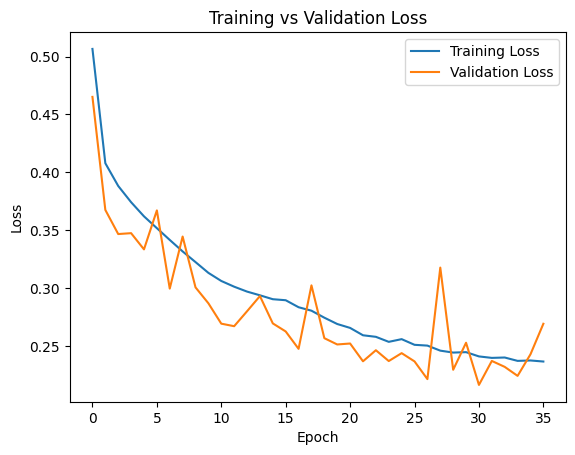

In [11]:
num_epochs = 50
train_losses = []
val_losses = []  
best_val_loss = float('inf')  
patience_counter = 0
early_stopping_patience = 5 

for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0

    
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():  # No need to track gradients for validation
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels.float())
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0  
    else:
        patience_counter += 1

    if patience_counter >= early_stopping_patience:
        print(f"Early stopping triggered at epoch {epoch+1}")
        break

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")


plt.plot(range(len(train_losses)), train_losses, label="Training Loss")
plt.plot(range(len(val_losses)), val_losses, label="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

Test Loss: 0.2605
Test Accuracy: 87.89%
F1 Score: 0.9113
Recall: 0.9736
Precision: 0.8566
False Positive Rate (FPR): 0.2887


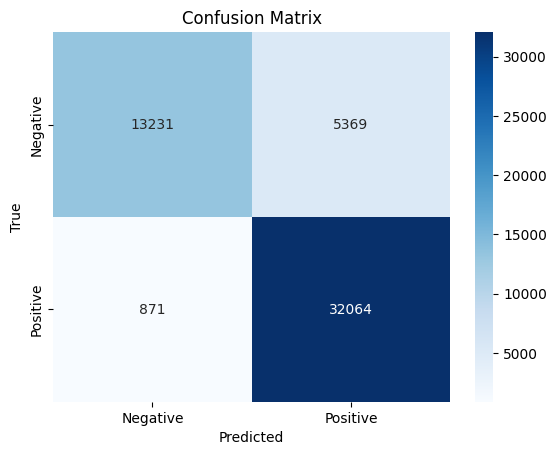

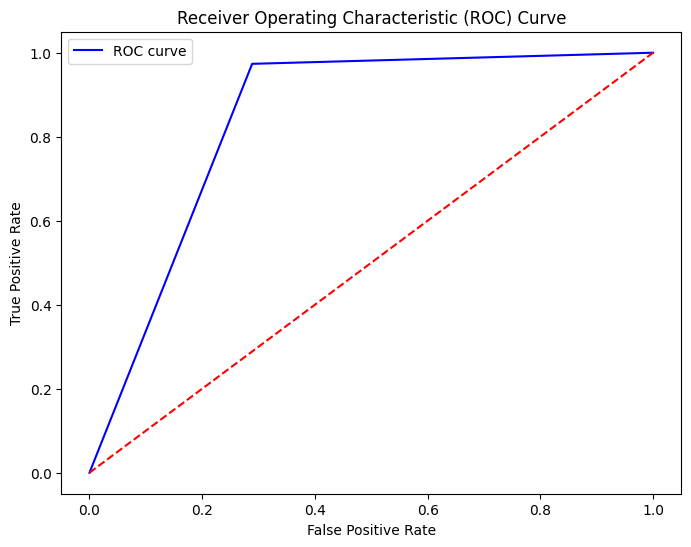

In [12]:
model.eval()
test_loss = 0.0
correct = 0
total = 0
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        test_loss += loss.item()

        predicted = (outputs.squeeze() > 0.5).long()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

avg_test_loss = test_loss / len(test_loader)
accuracy = 100 * correct / total

f1 = f1_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
fpr = fp / (fp + tn)

print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {accuracy:.2f}%")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='b', label='ROC curve')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()